In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
data_file = os.path.join(os.getcwd(), "data", "log.csv")

mydf = pd.read_csv(data_file, skiprows=6, delimiter="\t", index_col="Zeit")
mydf.index = pd.to_datetime(mydf.index, unit='s')
#mydf = mydf.dropna(axis = 0) 
mydf = mydf[mydf["DC1 U"].notna()]
#mydf.index = mydf.index.tz_localize ('Europe/Berlin')

#tz='Europe/Berlin'

In [23]:
print(mydf.tail(20))

DC1 U   DC1 I   DC1 P  DC1 T  DC1 S  DC2 U   DC2 I  \
Zeit                                                                      
2020-09-07 14:00:00  223.0  6060.0  1348.0    0.0    0.0  236.0  1931.0   
2020-09-07 14:05:01  225.0  3770.0   848.0    0.0    0.0  235.0  1576.0   
2020-09-07 14:10:01  226.0  3164.0   716.0    0.0    0.0  233.0  1465.0   
2020-09-07 14:15:01  222.0  7736.0  1716.0    0.0    0.0  236.0  1923.0   
2020-09-07 14:20:01  218.0  7767.0  1693.0    0.0    0.0  236.0  1708.0   
2020-09-07 14:25:01  235.0  7330.0  1720.0    0.0    0.0  234.0  1310.0   
2020-09-07 14:30:01  239.0  7604.0  1817.0    0.0    0.0  233.0  1177.0   
2020-09-07 14:35:01  240.0  7166.0  1717.0    0.0    0.0  232.0  1110.0   
2020-09-07 14:40:02  241.0  6215.0  1493.0    0.0    0.0  233.0  1175.0   
2020-09-07 14:45:02  238.0  7730.0  1843.0    0.0    0.0  233.0  1234.0   
2020-09-07 14:50:02  240.0  2589.0   622.0    0.0    0.0  233.0  1037.0   
2020-09-07 14:55:04  246.0  1007.0   247.0    

Index(['DC1 U', 'DC1 I', 'DC1 P', 'DC1 T', 'DC1 S', 'DC2 U', 'DC2 I', 'DC2 P',
       'DC2 T', 'DC2 S', 'DC3 U', 'DC3 I', 'DC3 P', 'DC3 T', 'DC3 S', 'AC1 U',
       'AC1 I', 'AC1 P', 'AC1 T', 'AC2 U', 'AC2 I', 'AC2 P', 'AC2 T', 'AC3 U',
       'AC3 I', 'AC3 P', 'AC3 T', 'AC F', 'FC I', 'Ain1', 'Ain2', 'Ain3',
       'Ain4', 'AC S', 'Err', 'ENS S', 'ENS Err', 'SH1 P', 'SH2 P', 'SH3 P',
       'SC1 P', 'SC2 P', 'SC3 P', 'HC1 P', 'HC2 P', 'HC3 P', 'SOC H', 'BAT Te',
       'BAT Cy', 'KB S', 'total E', 'OWN E', 'HOME E', 'Iso R', 'Ereignis'],
      dtype='object')


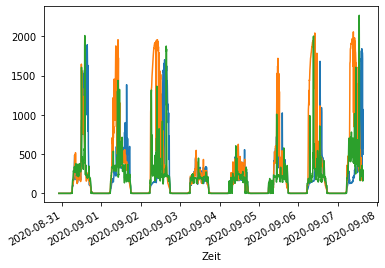

In [24]:

print(mydf.columns)
mydf["DC1 P"].plot()
mydf["DC2 P"].plot()
mydf["HC2 P"].plot()

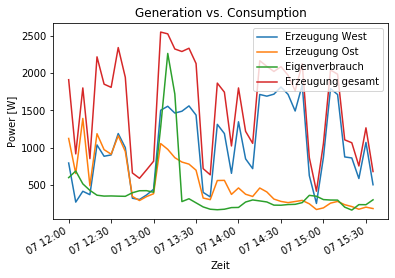

In [29]:
start_date = datetime(2020, 9, 7, 12)
end_date = datetime(2020, 9, 7, 17)


my_range = mydf.loc[start_date:end_date]
overall_production = my_range["DC1 P"] + my_range["DC2 P"]
plt.figure()
my_range["DC1 P"].plot(label='Erzeugung West')
my_range["DC2 P"].plot(label='Erzeugung Ost')
my_range["HC2 P"].plot(label='Eigenverbrauch')
overall_production.plot(label="Erzeugung gesamt")
#my_range.pv_generation.plot(label='Erzeugung gesamt')
#my_range.power_consumption.plot(label='Verbrauch')
plt.ylabel('Power [W]')
plt.title('Generation vs. Consumption')
plt.legend()